In [6]:
import cv2
import csv
import sys
import operator
import numpy as np
import config as cf
 
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torchvision
import matplotlib.pyplot as plt
 
from torchvision import datasets, models, transforms
from networks import *
from torch.autograd import Variable
from PIL import Image
%matplotlib inline

In [49]:
f = 'Im106_0'

original_img_dir = '/home/bumsoo/Data/ALL_IDB1/im/' + f + '.jpg'
mask_img_dir = '/home/bumsoo/Github/cellnet.pytorch/4_detector/results/ALL_IDB1/Granulocytes_vs_Mononuclear/masks/' + f + '.png'

original_img = cv2.imread(original_img_dir)
mask_img = cv2.imread(mask_img_dir)

mask_img[mask_img < 150] = 0
mask_img = cv2.GaussianBlur(mask_img, (41, 41), 0)
ret, threshed_img = cv2.threshold(cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(threshed_img, cv2.MORPH_CLOSE, kernel, iterations=20) 

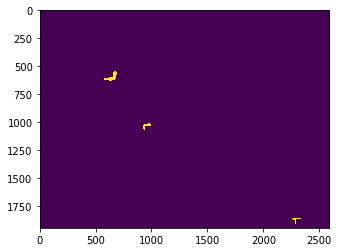

In [50]:
plt.imshow(closing)